# Predict expression modulation targets

Cameo provides algorithms to search for genes or reactions that can be over or down regulated in order to achieve a given biological objective.

In [1]:
from cobra.io import read_sbml_model

Load the E. coli core model.

In [2]:
model = read_sbml_model('data/e_coli_core.xml.gz')

## Succinate production

The production envelope looks like this.

In [3]:
from cameo.flux_analysis.analysis import phenotypic_phase_plane
production_envelope = phenotypic_phase_plane(model, 
                                             variables=[model.reactions.BIOMASS_Ecoli_core_w_GAM],
                                             objective=model.metabolites.succ_e)
production_envelope.plot(height=400)

## Flux Scanning based on Enforced Objective Flux

In [4]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [5]:
fseof = FSEOF(model)

In [6]:
result = fseof.run(target=model.reactions.EX_succ_e)

In [7]:
result.data_frame

1        2        3        4        5        6        7   \
ADK1        0.0000   0.0000   0.0000  -0.0000  -0.0000  -0.0000  -0.0000   
ENO        15.2389  15.7616  16.2124  16.5775  16.9427  17.3078  17.7044   
FBA         7.7569   8.0365   8.2425   8.3610   8.4796   8.5981   8.7478   
FRD7        0.0000   0.0000   0.0000   1.4532   3.1753   4.8974   6.5867   
GAPD       16.4311  16.8387  17.1736  17.4220  17.6704  17.9187  18.1984   
...            ...      ...      ...      ...      ...      ...      ...   
PPS         0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   
SUCCt3      1.4746   2.9491   4.4237   5.8983   7.3729   8.8475  10.3220   
THD2        0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.1197   
TPI         7.7569   8.0365   8.2425   8.3610   8.4796   8.5981   8.7478   
EX_succ_e   1.4746   2.9492   4.4237   5.8983   7.3729   8.8475  10.3220   

                8        9        10  
ADK1       -0.0000   0.4103   1.5273  
ENO        18.6023  19.2933  19.6280  
FBA         9.3931   9.8308   9.9109  
FRD7        7.7551   9.1278  10.8523  
GAPD       18.9767  19.5478  19.7620  
...            ...      ...      ...  
PPS         0.0000   0.4103   1.5273  
SUCCt3     11.7966  13.2712  14.7457  
THD2        2.1438   2.9168   1.5352  
TPI         9.3931   9.8308   9.9109  
EX_succ_e  11.7966  13.2712  14.7458  

[18 rows x 10 columns]

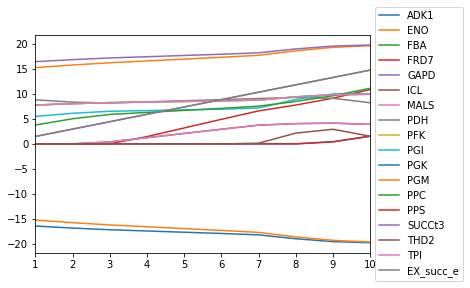

In [8]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Differential flux variability analysis

Compares flux ranges of a reference model to a set of models that have been parameterized to lie on a grid of evenly spaced points in the n-dimensional production envelope (n being the number of reaction bounds to be varied).

In [9]:
from cameo.strain_design.deterministic import DifferentialFVA

Set up a model that represents a reference state (in this case a model with a constrained growth rate).

In [10]:
model.reactions.EX_o2_e.lower_bound = 0
reference_model = model.copy()
biomass_rxn = reference_model.reactions.BIOMASS_Ecoli_core_w_GAM
biomass_rxn.lower_bound = 0.
target = reference_model.metabolites.succ_e

Set up the differential flux variability analysis strain design method.

In [11]:
diff_fva = DifferentialFVA(design_space_model=model,
                           reference_model=reference_model,
                           objective=target,
                           variables=[biomass_rxn],
                           normalize_ranges_by=biomass_rxn,
                           points=10)

Run differential flux variability analysis (only on the surface of the production envelope)

In [12]:
%time result = diff_fva.run(surface_only=True)
result.plot()

CPU times: user 1.26 s, sys: 28 ms, total: 1.29 s
Wall time: 1.41 s


In [13]:
result.plot(5, variables=['FBP', 'G6PDH2r', 'PGL', 'PGK'])

In [14]:
result

In [15]:
result.display_on_map(5, map_name="iJO1366.Central metabolism")